# Analysis of bacterial cell oritetation in microchannels
Analyse cell oritentation distribution in microchannels simulated with `CellModeller` [1].

## Purpose
Compare simualtion and experimental cell oritentation data to calibrate simulation parameters.

## Methodology
1. Read `.pickle` file into dictionary with `pickle` module.
2. Plot cell oritentation histogram for each simulation step.
3. Coallete all histograms into one interactive figure.

## WIP - improvements
Use this section only if the notebook is not final.

## Notable TODOs:

- Load multiple `.pickle` files. Store in a dictionary `{simulation_step: cell_state}`
- Plot oritentation histogram for each simulation step.
- Use `plotly` to visualize multiple steps in one figure.

## Results
`norm` - cell orientation vector. **Note** Already normalized. 

## Suggested next steps
- Load, process and analyse experimetal data
- Compare experimetal and simualtion data plots

# Setup
## Library import

In [1]:
import os
from os.path import join as join_paths, basename as get_basename
import pickle
import numpy as np

In [2]:
os.chdir("/home/i/igors-dubanevics/projects/bacteria-microchannel/cellmodeller")
os.getcwd()

'/home/i/igors-dubanevics/projects/bacteria-microchannel/cellmodeller'

## Parameter definition

In [3]:
data_dir_path = "data/simpleGrowth2D_microchannel-22-11-10-16-20"
data_file_name = join_paths(data_dir_path, 'step-01000.pickle')

out_dir_path = join_paths("scratch", get_basename(data_dir_path))
os.makedirs(out_dir_path, exist_ok=True)

## Data import

In [4]:
# Get data from a saved pickle file
data = pickle.load(open(data_file_name,'rb'))
cs = data['cellStates']

## Data processing

In [5]:
# Make some convenient data arrays from cell properties
lengths = np.array([cell.length for (id,cell) in cs.items()])
pos = np.array([cell.pos for (id,cell) in cs.items()])
norm = np.array([cell.dir for (id,cell) in cs.items()])

In [6]:
x_norm = np.array((1,0,0), dtype=float)
inner_prods = np.inner(x_norm,norm)
angles = np.arccos(inner_prods)

In [7]:
angles

array([0.00316443, 0.01721516, 0.00304932, 0.3420487 , 0.11784319,
       0.07413044, 0.00165584, 0.13812244, 0.02413472, 0.2093178 ,
       0.13813283, 0.02801652, 0.15543832, 0.13973349, 0.00936053,
       0.04451768, 0.31600506, 0.23218349, 0.1450488 , 0.19222295,
       0.09322899, 0.15884671, 0.02210293, 0.34494045, 0.02265168,
       0.33918685, 0.05368075, 0.34018738, 0.0504427 , 0.02111256,
       0.15259148, 0.00815593, 0.23170535, 0.01668056, 0.2511363 ,
       0.01645026, 0.25873768, 0.01759191, 0.        , 0.01158067,
       0.27122177, 0.00084573, 0.        , 0.00332964, 0.01546025,
       0.03918384, 0.03526304, 0.        , 0.01256325, 0.15147929,
       0.07318443, 0.01157037, 0.09471476, 0.13071169])

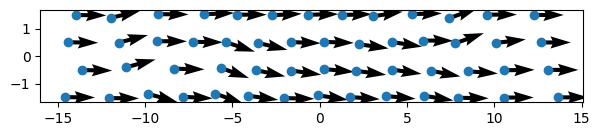

In [8]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Plot the position and orientation of each cell
plt.figure(figsize=(7,1.2))
plt.plot(pos[:,0], pos[:,1], 'o')
plt.quiver(pos[:,0], pos[:,1], norm[:,0], norm[:,1])

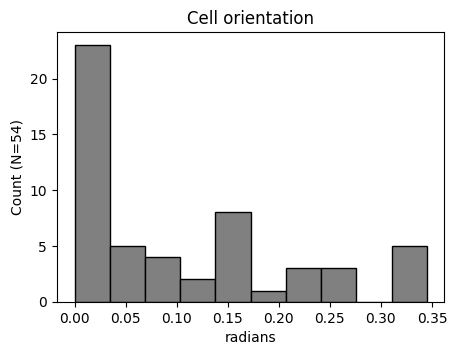

In [9]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title('Cell orientation')
plt.hist(angles, edgecolor='black', color='gray')
plt.xlabel('radians')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path,'oritent_hist.pdf'), dpi=300)

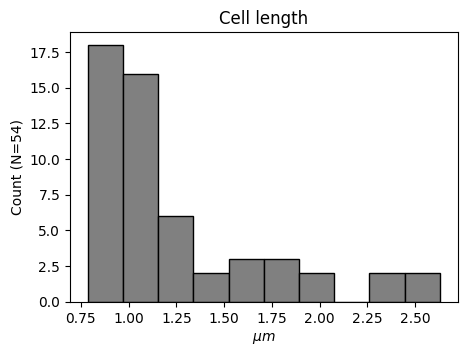

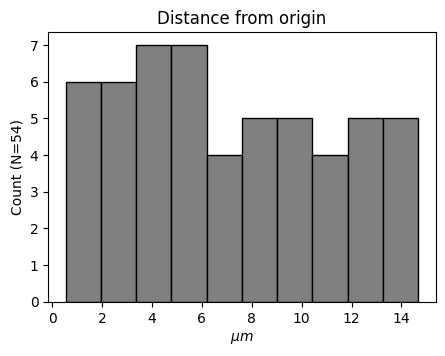

In [10]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title('Cell length')
plt.hist(lengths, edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'length_hist.pdf'), dpi=300)

# Distance from origin
plt.figure(figsize=(5,3.5))
plt.title('Distance from origin')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2), edgecolor='black', color='gray')
plt.xlabel('$\mu m$')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig(join_paths(out_dir_path, 'pos_hist.pdf'), dpi=300)

## References
We report here relevant references:
1. https://github.com/cellmodeller/CellModeller
2. 